## Option payoff formulae and diagrams
Options have total value which comprises two elements:
1. **Time value** - Time value arises due to the volatility of the option's underlying asset and the fact that it can move over the period before expiration. Time value depends on *time* to option expiration (obviously) and *volatility*
2. **Intrinsic value** - this is the value, if any, which arises from the price of the underlying asset and and the option strike price. If the underlying asset price *S* is less than the option strike price *K*, a call option will have no intrinsic value, whereas the intrinsic value of the put option is equal to *K-S*

At expiration, options clearly have no time value, so all that remains is *intrinsic value*. The payoff formulae at expiration are thefore:
* *call = MAX(S - K, 0)*
* *put  = MAX(K - S, 0)*

## Combining payoffs - put-call parity example
Suppose we have two options, one call and one put - same:
* expiration
* underlying
* strike

Furthermore, imagine we own (are *long*) the call option and we have sold (are *short*) the put option.

At expiration, therefore, the profile can be constructed by subtracting (since we are *short*) the above put payoff from the (long) call payoff. You will notice that this combination of a +call and a -put (long call and short put) gives rise to a linear instrument, which is quite remarkable : we are constructing a linear asset from two non-linear option instruments.

This combination is therefore sometimes referred to as a **synthetic forward**.

# Black Scholes Option Valuation Formula
The Black–Scholes formula calculates the price of European put and call options. This price is consistent with the Black–Scholes equation as above; this follows since the formula can be obtained by solving the equation for the corresponding terminal and boundary conditions.

The value of a call option for a non-dividend-paying underlying stock in terms of the Black–Scholes parameters is:

\begin{aligned}C(S_{t},t)&=N(d_{1})S_{t}-N(d_{2})Ke^{-r(T-t)}\\d_{1}&={\frac {1}{\sigma {\sqrt {T-t}}}}\left[\ln \left({\frac {S_{t}}{K}}\right)+\left(r+{\frac {\sigma ^{2}}{2}}\right)(T-t)\right]\\d_{2}&=d_{1}-\sigma {\sqrt {T-t}}\\\end{aligned}

Where:

* **$N ( ⋅ ) $**  is the cumulative distribution function of the standard normal distribution
* **$T − t  $** is the time to maturity (expressed in years)
* **$S_t  $** is the spot price of the underlying asset
* **$K   $**  is the strike price
* **$r   $** is the risk free rate (annual rate, expressed in terms of continuous compounding)
* **$σ   $** is the volatility of returns of the underlying asset


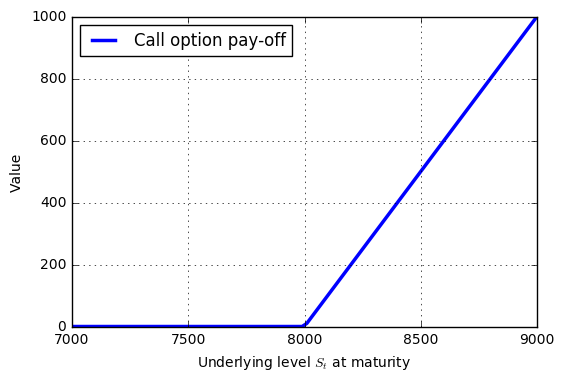

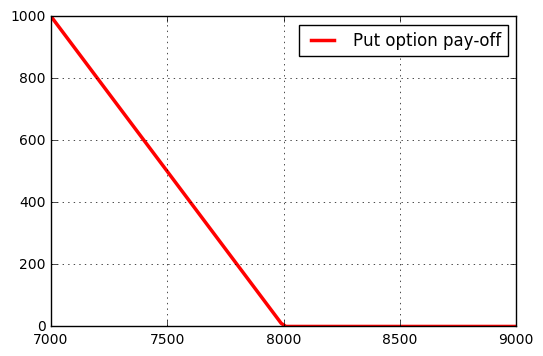

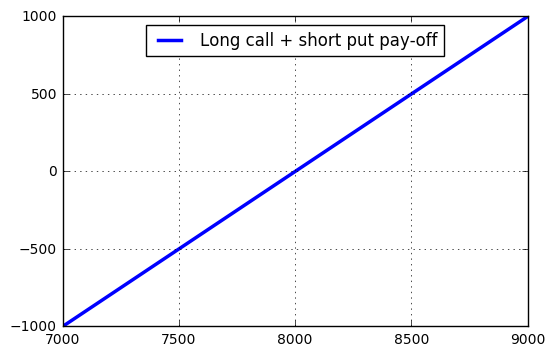

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

__author__ = 'John Barclay'
__copyright__ = 'Copyright 2017 GFT'

K= 8000 # oPTION STRIKE PRICE
S = np.linspace(7000, 9000, 100)# numpy array of 100 spot values for underlying

#Here are the expiration payoff equations for call and put options
call = np.maximum(S - K, 0)
put  = np.maximum(K - S, 0)
plt.figure()
plt.grid(True)
plt.plot(S, call, lw=2.5, label='Call option pay-off')  

plt.xlabel('Underlying level $S_t$ at maturity')
plt.ylabel('Value')
plt.legend(loc='upper left')
plt.show()
plt.plot(S, put,  lw=2.5, color='red', label='Put option pay-off') 
plt.legend(loc='upper right')
plt.grid(True)
plt.show()
plt.plot(S, call-put,  lw=2.5, label='Long call + short put pay-off') 
plt.legend(loc='upper center')
plt.grid(True)
plt.show()

In [2]:
# Black-Scholes-Merton option valuation Model
from scipy import stats
import math

def BSM_Option_value(S, K, T, r, vol, pc='call'):
    ''' Analytical European call option value for Black-Scholes-Merton (1973).
    S0: Underlying price
    K:  option strike price
    T:  expiration - time-to-maturity in fraction of year
    r:  constant short interest rate
    vol:volatility of underlying asset

    Returns :European put/call option present value
    '''
    d1 = (math.log(S/K) + (r+0.5*vol** 2)*T) / (vol*math.sqrt(T))
    d2 = d1 - vol * math.sqrt(T) 

    if pc.lower()=='call':
        return( S*stats.norm.cdf( d1)- K*math.exp(-r*T)*stats.norm.cdf(d2))
    else:
        return(-S*stats.norm.cdf(-d1)+ K*math.exp(-r*T)*stats.norm.cdf(-d2)) 

S0 = 7500.00 # initial index level
K  = 8000.00 # strike price
T = .25 # call option maturity
r = 0.05 # constant short rate
vol = 0.25 # constant volatility factor of diffusion
print "Value of European {} option is {}".format('call', BSM_Option_value(S0, K, T, r, vol, 'call') )

Value of European call option is 216.166574866


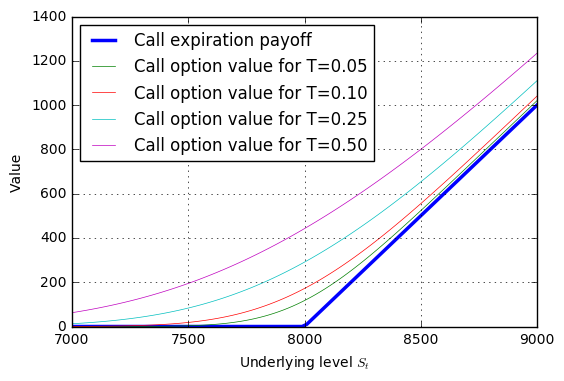

In [3]:
from numpy import vectorize
plt.close()
S = np.linspace(7000, 9000, 100)
#vectorise BSM_Option_value function so we can use numpy.ndarray vector of 'S' underlying prices.
vBSValue=vectorize(BSM_Option_value)

fig=plt.figure()
plt.grid(True)
plt.plot(S, call, lw=2.5, label="Call expiration payoff")
pvs=list()
Ts=[.05, .1, .25, .5] # Selection list of expiry times in fractions of year
for i,T in enumerate(Ts):
    pvs.append(vBSValue(S, 8000, Ts[i], r, .15))
    plt.plot(S, pvs[i], lw=.5, label="Call option value for T={exp:1.2f}".format(exp=Ts[i]))
plt.xlabel('Underlying level $S_t$')
plt.ylabel('Value')
plt.legend(loc='upper left')
plt.show()

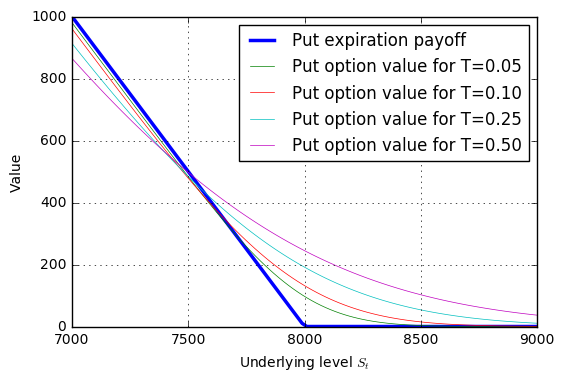

In [4]:
from numpy import vectorize
plt.close()
S = np.linspace(7000, 9000, 100)
#vectorise BSM_Option_value function so we can use numpy.ndarray vector of 'S' underlying prices.
vBSValue=vectorize(BSM_Option_value)

fig=plt.figure()
plt.grid(True)
plt.plot(S, put, lw=2.5, label="Put expiration payoff")
pvs=list()
Ts=[.05, .1, .25, .5] # Selection list of expiry times in fractions of year
for i,T in enumerate(Ts):
    pvs.append(vBSValue(S, 8000, Ts[i], r, .15, pc="put"))
    plt.plot(S, pvs[i], lw=.5, label="Put option value for T={exp:1.2f}".format(exp=Ts[i]))
plt.xlabel('Underlying level $S_t$')
plt.ylabel('Value')
plt.legend(loc='upper right')
plt.show()

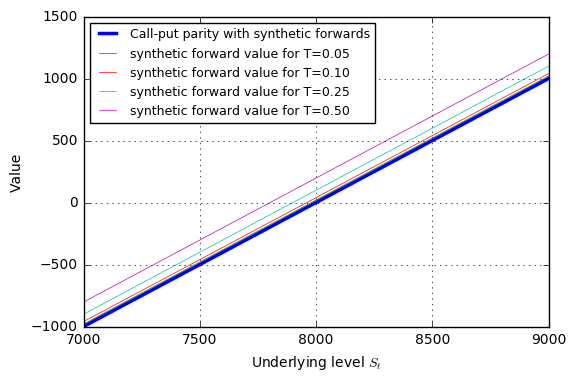

In [5]:
from numpy import vectorize
plt.close()
S = np.linspace(7000, 9000, 100)
#vectorise BSM_Option_value function so we can use numpy.ndarray vector of 'S' underlying prices.
vBSValue=vectorize(BSM_Option_value)

fig=plt.figure()
plt.grid(True)
plt.plot(S, call-put, lw=2.5, label="Call-put parity with synthetic forwards")
calls=list()
puts =list()
Ts=[.05, .1, .25, .5] # Selection list of expiry times in fractions of year
for i,T in enumerate(Ts):
    calls.append(vBSValue(S, 8000, Ts[i], r, .15, pc="call"))
    puts.append(vBSValue(S, 8000, Ts[i], r, .15, pc="puts"))
    plt.plot(S, calls[i]-puts[i], lw=.5, label="synthetic forward value for T={exp:1.2f}".format(exp=Ts[i]))
plt.xlabel('Underlying level $S_t$')
plt.ylabel('Value')
plt.legend(loc='upper left',prop={'size':9})
plt.show()